# **Stock & Revenue Dashboard: Tesla vs GameStop**

## Question 1 – Extract Tesla Stock Data with yfinance (2 points)

In [8]:
# Question 1: Extract Tesla stock data using yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Create the Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Download full historical stock data
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Show the first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 – Scrape Tesla Revenue Data with Web Scraping (1 point)

In [9]:
# Function to safely extract and clean revenue data
def extract_and_clean_revenue(financials_df, company_name=""):
    if "Total Revenue" not in financials_df.index:
        print(f"Warning: 'Total Revenue' not found for {company_name}.")
        return pd.DataFrame(columns=["Date", "Revenue"])  #return empty DataFrame with expected structure

    revenue_df = financials_df.loc["Total Revenue"].reset_index()
    revenue_df.columns = ["Date", "Revenue"]

    revenue_df = revenue_df.dropna()
    revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
    revenue_df = revenue_df.dropna()
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])
    revenue_df = revenue_df.sort_values("Date")

    return revenue_df

tesla_revenue = extract_and_clean_revenue(tesla.financials, "Tesla")

# Show last five rows of Tesla revenue
print("\nTesla Revenue (tail):")
print(tesla_revenue.tail())


Tesla Revenue (tail):
        Date       Revenue
3 2021-12-31  5.382300e+10
2 2022-12-31  8.146200e+10
1 2023-12-31  9.677300e+10
0 2024-12-31  9.769000e+10


## Question 3 – Extract GameStop Stock Data with yfinance (2 points)

In [10]:
#create the Ticker object for GME
gme = yf.Ticker("GME")

#download full history
gme_data = gme.history(period="max")

#reset the index and show the first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 – Scrape GameStop Revenue Data with Web Scraping (1 point)

In [11]:
gme_revenue = extract_and_clean_revenue(gme.financials, "GameStop")

# Show last five rows of GameStop revenue
print("\nGameStop Revenue (tail):")
print(gme_revenue.tail())


GameStop Revenue (tail):
        Date       Revenue
3 2022-01-31  6.010700e+09
2 2023-01-31  5.927200e+09
1 2024-01-31  5.272800e+09
0 2025-01-31  3.823000e+09


## Question 5 – Plot Tesla Stock Price vs. Revenue (2 points)

In [13]:
# Clean stock data based on minimum date
def clean_stock_data(stock_df, min_date):
    stock_df["Date"] = pd.to_datetime(stock_df["Date"]).dt.tz_localize(None)
    return stock_df[stock_df["Date"] >= min_date]

tesla_data = clean_stock_data(tesla_data, tesla_revenue["Date"].min())
gme_data = clean_stock_data(gme_data, gme_revenue["Date"].min())

# Define a function to plot stock price vs revenue
def make_graph(stock_df, revenue_df, symbol):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_title(f"{symbol}: Closing Price vs. Annual Revenue")

    ax1.plot(stock_df['Date'], stock_df['Close'], label="Close Price (USD)", color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Close Price (USD)")
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'], color='orange', label="Revenue (USD)")
    ax2.set_ylabel("Revenue (USD)")
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

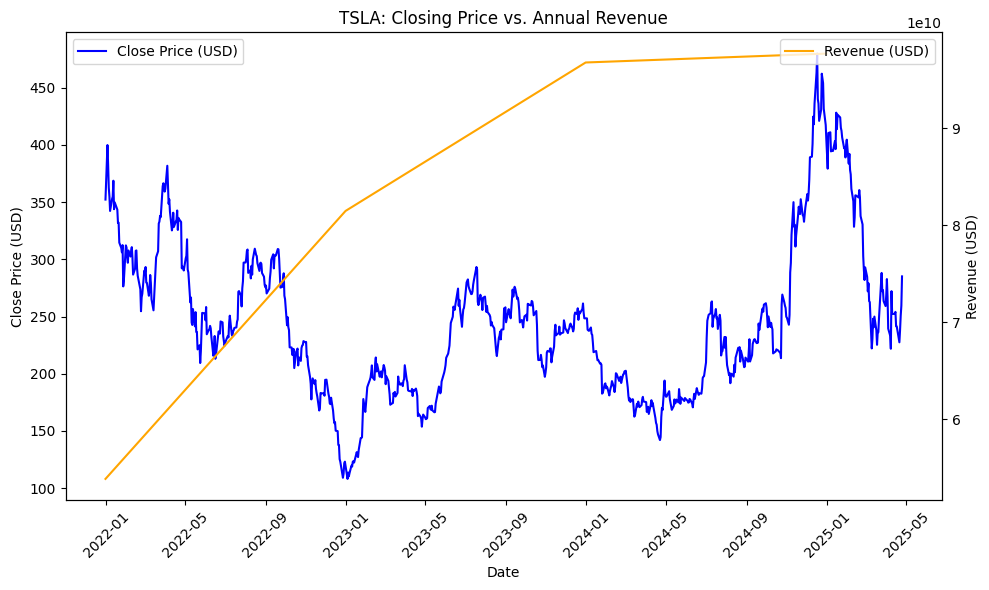

In [14]:
make_graph(tesla_data, tesla_revenue, "TSLA")

## Question 6 – Plot GameStop Stock Price vs. Revenue (2 points)

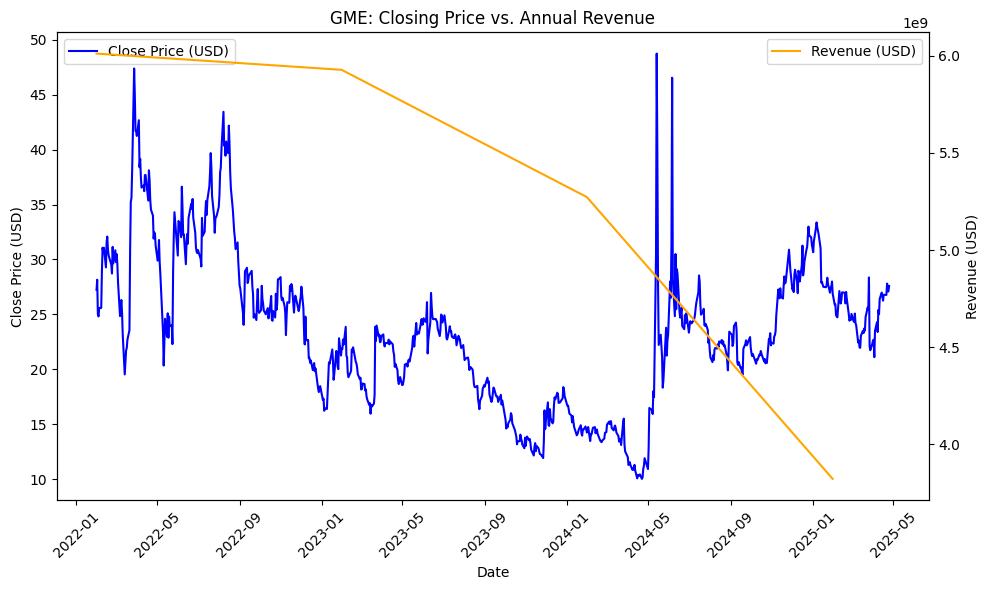

In [15]:
make_graph(gme_data, gme_revenue, "GME")